In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
mpl.style.use('seaborn')
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

import skimage
from skimage import io
from skimage import color
from skimage import feature

In [15]:
%%time

def cos_dis(a, b):
    return np.dot(a, b) / (LA.norm(a) * LA.norm(b))

def get_lbp_hist(grey_img):
    P, R = 8, 1
    lbp = feature.local_binary_pattern(grey_img, P, R, method='ror')
    lbp = np.uint8(lbp).ravel()
    hist, _ = np.histogram(lbp, normed=True, bins=256, range=(0, 256))
    return hist

img_paths = [
    'data/violet.jpg',
    'data/kim.jpg',
    'data/osas.png'
]

rgb_imgs = [io.imread(p) for p in img_paths]
grey_imgs = [skimage.color.rgb2grey(rgb_img) for rgb_img in rgb_imgs]
lbps = [get_lbp_hist(img) for img in grey_imgs]

CPU times: user 109 ms, sys: 7.79 ms, total: 117 ms
Wall time: 117 ms


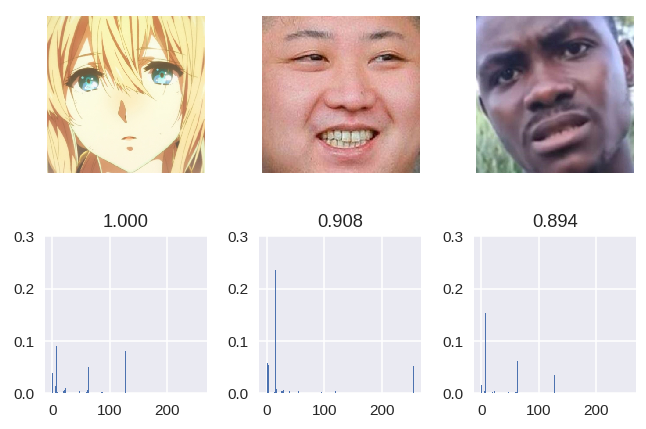

CPU times: user 2.36 s, sys: 1.46 s, total: 3.82 s
Wall time: 2.14 s


In [16]:
%%time

fig, ax = plt.subplots(nrows=2, ncols=3, dpi=110)
for i in range(3):
    ax[0, i].imshow(rgb_imgs[i])
    ax[0, i].axis('off')
    ax[1, i].bar(np.arange(256), lbps[i])
    ax[1, i].set_ylim(0, 0.3)
    ax[1, i].set_title('{:.3f}'.format(cos_dis(lbps[0], lbps[i])))
fig.tight_layout()
plt.show()